In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [9]:
path = "./myopia.csv"
df = pd.read_csv(path)

In [10]:
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [11]:
df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

<h3>Preprocessing Dataset</h3>

In [12]:
#Defining target column
labels = df['MYOPIC']

In [21]:
labels.head(3)

0    1
1    0
2    0
Name: MYOPIC, dtype: int64

In [13]:
#Defining features
X = df.drop('MYOPIC',axis=1)

In [22]:
X.head(1)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.69,3.498,14.7,45,8,0,0,10,34,1,1


In [14]:
#Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

In [24]:
df_scaled

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

<h3>Dimensionality Reduction</h3>

In [25]:
#Reducing dimensionality with pca
pca = PCA(n_components = 0.99)
df_pca = pca.fit_transform(df_scaled)

In [28]:
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566,
       0.04286506, 0.03839767])

In [31]:
pca.explained_variance_ratio_.sum()

0.999998899881608

In [34]:
#Run t-SNE on the pca output to further reduce dimensionality.
tsne = TSNE()
df_tsne = tsne.fit_transform(df_pca)

/Users/kevin/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kevin/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [47]:
print(df_tsne)
print("\n")
print(df_tsne.sum())

[[ 12.927711   14.714917 ]
 [ -1.6097189  -3.8151453]
 [ 16.641542   -9.340527 ]
 ...
 [ -3.044242   -5.378899 ]
 [ 15.288787  -17.13342  ]
 [ -4.97048    -8.348285 ]]


537.5964


<h3>Cluster Analysis</h3>

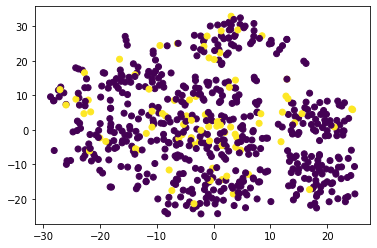

In [72]:
#Plotting the tsne numpy array
plt.scatter(df_tsne[:,0],df_tsne[:,1],c=labels)

In [105]:
#Loops through to determine inertia for each k
inertia = []
for k in range(1,11):
    k_means = KMeans(n_clusters=k,random_state=0)
    k_means.fit(df_pca)
    inertia.append(k_means.inertia_)

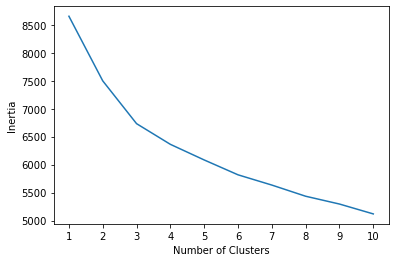

In [109]:
#Plots the elbow curve
plt.plot(range(1,11), inertia)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

The elbow seems to be at k=3

<h1>Recommendation</h1>

<h3>Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters?:</h3>

Once having plotted the t-SNE output there was no clear margins on the clustering visual. I would also not recommend patients to be clustered due to the inertia values that were high relative to other KMean values.